# E-commerce text classification

**Descripción :**

En este proyecto usaremos un data set de descripciones de productos de E-commerce para clasificarlos en 5 categorías. Este es un proyecto desafiante ya que es nuestro primer intento de resolver un problema de clasificación de texto.

**Team:**  
* Chaparro Sicardo Tanibeth  
* Malváez Flores Axel Daniel

* Obtención de los datos

In [27]:
# Librerías importantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

In [28]:
ecommerce_df = pd.read_csv('../Data/ecommerceDataset.csv', header=None)
ecommerce_df.columns = ['Category', 'Description']
ecommerce_df.head(3)

,Category,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...


## Data Exploration                 

* No. registros:

In [29]:
print(f'Total de registros: {len(ecommerce_df)}')

Total de registros: 50425


* Número de categorías y proporción

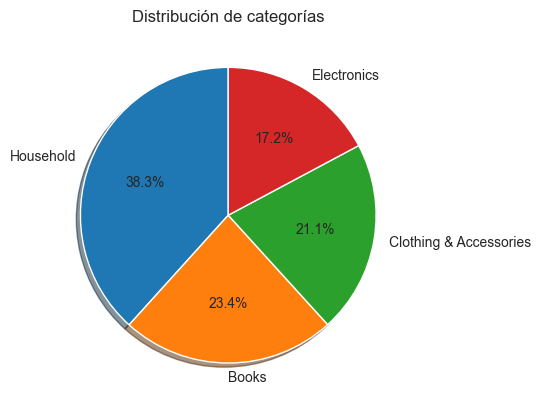

In [30]:
plt.pie(ecommerce_df['Category'].value_counts(), labels=ecommerce_df['Category'].unique(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribución de categorías')
plt.show()

Notemos que tenemos clases desbalanceadas. Esto es un problema ya que nuestro modelo puede tender a clasificar la mayoría de los productos en la clase mayoritaria. Es necesario entender nuestros modelos y métricas para poder lidiar con este problema. El caso idóneo sería que todas tuvieran la misma cantidad de registros (25% en cada clase).

* Longitud de las descripciones

Dado que tenemos elementos en nan, es necesario eliminarlos para poder graficar la longitud de las descripciones.

In [31]:
x = ecommerce_df['Description'].str.lower()

num_min = 0

while num_min < 3:
    x_lens = [len(str(i)) for i in x]

    idx_max = np.argmax(x_lens)
    idx_min = np.argmin(x_lens)
    
    num_min = len(str(x[idx_min]))

    print(f'El registro con la descripción más larga con longitud {len(x[idx_max])} es: {x[idx_max]}')
    print(f'El registro con la descripción más corta con longitud {len(str(x[idx_min]))} es: {x[idx_min]}')
    
    print(f'El label es {ecommerce_df["Category"][idx_min]}')
    print('')
    print(f'Items antes : {x.shape}')
    x.drop(idx_min, inplace=True)
    x.reset_index(drop=True, inplace=True)
    print(f'Items después : {x.shape}')

El registro con la descripción más larga con longitud 50403 es: risk savvy: how to make good decisions about the author gerd gigerenzer is the author of gut feelings. he is currently the director of the max planck institute for human development in berlin, germany, and lectures around the world on the importance of proper risk education for everyone from school-age children to prominent doctors, bankers, and politicians. 				    	 					 excerpt. © reprinted by permission. all rights reserved. praise for gerd gigerenzer’s work“logic be damned! . . . gigerenzer delivers a convincing argument for going with your gut.”—men’s health“all innumerates—buyers, sellers, students, professors, doctors, patients, lawyers and their clients, politicians, voters, writers, and readers—have something to learn from gigerenzer.” —publishers weekly“gladwell drew heavily on gigerenzer’s research. but gigerenzer goes a step further by explaining just why our gut instincts are so often right.” —businessweek“[

* Distribución de las longitudes

In [32]:
x_desc = ecommerce_df['Description'].str.lower()
x_lens = [len(str(i)) for i in x_desc]
ecommerce_df['Longitud'] = x_lens
ecommerce_df.head(3)

,Category,Description,Longitud
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,1338
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",346
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,1316


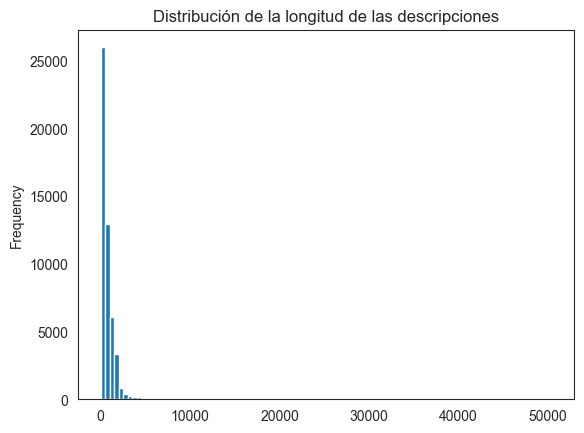

In [33]:
ecommerce_df['Longitud'].plot.hist(bins=100)
plt.title('Distribución de la longitud de las descripciones')
plt.show()

* Descripción de la clase Household

In [34]:
ecommerce_df[ecommerce_df['Category'] == 'Household'].describe()

,Longitud
count,19313.000000
mean,671.543779
std,606.382618
min,8.000000
25%,274.000000
50%,515.000000
75%,903.000000
max,10168.000000


* Descripción de la clase Electronics

In [35]:
ecommerce_df[ecommerce_df['Category'] == 'Electronics'].describe()

,Longitud
count,10621.000000
mean,851.107523
std,813.681965
min,9.000000
25%,293.000000
50%,630.000000
75%,1222.000000
max,12473.000000


* Descripción de la clase Clothing & Accessories

In [36]:
ecommerce_df[ecommerce_df['Category'] == 'Clothing & Accessories'].describe()

,Longitud
count,8671.000000
mean,446.250029
std,393.465462
min,3.000000
25%,181.000000
50%,342.000000
75%,568.000000
max,3474.000000


* Descripción de la clase Books

In [37]:
ecommerce_df[ecommerce_df['Category'] == 'Books'].describe()

,Longitud
count,11820.000000
mean,857.007783
std,1624.798676
min,4.000000
25%,81.000000
50%,495.000000
75%,1064.000000
max,50403.000000


* Manejo de valores faltantes

In [38]:
# Revisemos si tenemos valores faltantes en alguna de las columnas
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     50425 non-null  object
 1   Description  50424 non-null  object
 2   Longitud     50425 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [39]:
# Eliminamos las filas con valores faltantes
ecommerce_df = ecommerce_df.dropna(subset=['Description'])

ecommerce_df[ecommerce_df['Description'].isnull()]

,Category,Description,Longitud


In [40]:
# Revisemos si tenemos valores faltantes en alguna de las columnas
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50424 entries, 0 to 50424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     50424 non-null  object
 1   Description  50424 non-null  object
 2   Longitud     50424 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


## Limpieza

### Funciones de limpieza

In [41]:
# Librerías necesarias
# import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer, word_tokenize
import string
import re

# Corpus de spacy
# corpus = spacy.load('en_core_web_sm')
# Corpus de NLTK
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* Funciones que nos ayudaran a:
    * ***process_text*** : Eliminar caracteres especiales y stopwords
    * ***tokenize_stemming_func*** : Tokenizamos nuestro texto y aplicamos stemming
    * ***tokenize_lemma_func*** : Tokenizamos nuestro texto y aplicamos lemmatization

In [42]:
# Función para eliminar stopwords y caracteres especiales
def process_text(text):
  # Minúsculas y caracteres especiales
  text = text.lower()
  text = re.sub(r'[^a-zA-Z\s]', '', text)

  # Elimninando las stopwords
  words = text.split()
  words = [word for word in words if word not in stopwords.words('english')]
  return ' '.join(words)

def tokenize_stemming_func(text):
  # Tokenizar
  tokens_ =  word_tokenize(text, language='english')
  # Stemming
  stemmer = PorterStemmer()
  stems = []
  for w in tokens_:
    stem_word = stemmer.stem(w)
    stems.append(stem_word)
  return stems

def tokenize_lemma_func(text):
  # Tokenizar
  tokens_ =  word_tokenize(text, language='english')
  
  # Lemmatizar
  lemmatizer = nltk.stem.WordNetLemmatizer()
  lemmas = []
  for w in tokens_:
    lemmas.append(lemmatizer.lemmatize(w))
  return lemmas

### Verificamos la remoción de stopwords y caracteres especiales

In [53]:
# Aplicamos la función al dataframe
test_df = ecommerce_df.head(500)

test_df['Description'] = test_df['Description'].apply(process_text)
test_df.head(3)

KeyboardInterrupt: 

In [44]:
print(f"Descripción antes de procesar el texto:\n")
print(ecommerce_df['Description'].iloc[0])

Descripción antes de procesar el texto:

Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some ar

In [45]:
print(f"Descripción después de procesar el texto:\n")
print(test_df['Description'].iloc[0])

Descripción después de procesar el texto:

paper plane design framed wall hanging motivational office decor art prints x inch set painting made synthetic frame uv textured print gives multi effects attracts towards special series paintings makes wall beautiful gives royal touch painting ready hang would proud possess unique painting niche apart use modern efficient printing technology prints inks precision epson roland hp printers innovative hd printing technique results durable spectacular looking prints highest last lifetime print solely topnotch inks achieve brilliant true colours due high level uv resistance prints retain beautiful colours many years add colour style living space digitally printed painting pleasure eternal blissso bring home elegant print lushed rich colors makes nothing sheer elegance friends familyit would treasured forever whoever lucky recipient liven place intriguing paintings high definition hd graphic digital prints home office room


### Tokenizing y Stemming

In [46]:
test_df['Description'] = test_df['Description'].apply(tokenize_stemming_func)
test_df.head(3)

/var/folders/8l/f787_tgj7sg6grwn27dvfx0h0000gn/T/ipykernel_10218/2126189129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Description'] = test_df['Description'].apply(tokenize_stemming_func)


,Category,Description,Longitud
0,Household,"[paper, plane, design, frame, wall, hang, moti...",1338
1,Household,"[saf, floral, frame, paint, wood, inch, x, inc...",346
2,Household,"[saf, uv, textur, modern, art, print, frame, p...",1316


In [47]:
print(f"Descripción después de tokenizar y hacer stemming:\n")
print(test_df['Description'].iloc[0])

Descripción después de tokenizar y hacer stemming:

['paper', 'plane', 'design', 'frame', 'wall', 'hang', 'motiv', 'offic', 'decor', 'art', 'print', 'x', 'inch', 'set', 'paint', 'made', 'synthet', 'frame', 'uv', 'textur', 'print', 'give', 'multi', 'effect', 'attract', 'toward', 'special', 'seri', 'paint', 'make', 'wall', 'beauti', 'give', 'royal', 'touch', 'paint', 'readi', 'hang', 'would', 'proud', 'possess', 'uniqu', 'paint', 'nich', 'apart', 'use', 'modern', 'effici', 'print', 'technolog', 'print', 'ink', 'precis', 'epson', 'roland', 'hp', 'printer', 'innov', 'hd', 'print', 'techniqu', 'result', 'durabl', 'spectacular', 'look', 'print', 'highest', 'last', 'lifetim', 'print', 'sole', 'topnotch', 'ink', 'achiev', 'brilliant', 'true', 'colour', 'due', 'high', 'level', 'uv', 'resist', 'print', 'retain', 'beauti', 'colour', 'mani', 'year', 'add', 'colour', 'style', 'live', 'space', 'digit', 'print', 'paint', 'pleasur', 'etern', 'blissso', 'bring', 'home', 'eleg', 'print', 'lush', 'rich',

### Tokenizing y Lemmatization

In [48]:
# Aplicamos la función al dataframe
test_df = ecommerce_df.head(500)

test_df['Description'] = test_df['Description'].apply(process_text)
test_df.head(3)

/var/folders/8l/f787_tgj7sg6grwn27dvfx0h0000gn/T/ipykernel_10218/3004558066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Description'] = test_df['Description'].apply(process_text)


,Category,Description,Longitud
0,Household,paper plane design framed wall hanging motivat...,1338
1,Household,saf floral framed painting wood inch x inch sp...,346
2,Household,saf uv textured modern art print framed painti...,1316


In [49]:
test_df['Description'] = test_df['Description'].apply(tokenize_lemma_func)
test_df.head(3)

/var/folders/8l/f787_tgj7sg6grwn27dvfx0h0000gn/T/ipykernel_10218/3882650866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Description'] = test_df['Description'].apply(tokenize_lemma_func)


,Category,Description,Longitud
0,Household,"[paper, plane, design, framed, wall, hanging, ...",1338
1,Household,"[saf, floral, framed, painting, wood, inch, x,...",346
2,Household,"[saf, uv, textured, modern, art, print, framed...",1316


In [50]:
print(f"Descripción después de tokenizar y hacer stemming:\n")
print(test_df['Description'].iloc[0])

Descripción después de tokenizar y hacer stemming:

['paper', 'plane', 'design', 'framed', 'wall', 'hanging', 'motivational', 'office', 'decor', 'art', 'print', 'x', 'inch', 'set', 'painting', 'made', 'synthetic', 'frame', 'uv', 'textured', 'print', 'give', 'multi', 'effect', 'attracts', 'towards', 'special', 'series', 'painting', 'make', 'wall', 'beautiful', 'give', 'royal', 'touch', 'painting', 'ready', 'hang', 'would', 'proud', 'posse', 'unique', 'painting', 'niche', 'apart', 'use', 'modern', 'efficient', 'printing', 'technology', 'print', 'ink', 'precision', 'epson', 'roland', 'hp', 'printer', 'innovative', 'hd', 'printing', 'technique', 'result', 'durable', 'spectacular', 'looking', 'print', 'highest', 'last', 'lifetime', 'print', 'solely', 'topnotch', 'ink', 'achieve', 'brilliant', 'true', 'colour', 'due', 'high', 'level', 'uv', 'resistance', 'print', 'retain', 'beautiful', 'colour', 'many', 'year', 'add', 'colour', 'style', 'living', 'space', 'digitally', 'printed', 'painting', 

# Limpieza con PySpark

In [51]:
# Importamos librerías necesarias
import itertools
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

In [52]:
spark = SparkSession.builder.appName('ML_Project').getOrCreate()

Error: Missing application resource.

Usage: spark-submit [options] <app jar | python file | R file> [app arguments]
Usage: spark-submit --kill [submission ID] --master [spark://...]
Usage: spark-submit --status [submission ID] --master [spark://...]
Usage: spark-submit run-example [options] example-class [example args]

Options:
  --master MASTER_URL         spark://host:port, mesos://host:port, yarn,
                              k8s://https://host:port, or local (Default: local[*]).
  --deploy-mode DEPLOY_MODE   Whether to launch the driver program locally ("client") or
                              on one of the worker machines inside the cluster ("cluster")
                              (Default: client).
  --class CLASS_NAME          Your application's main class (for Java / Scala apps).
  --name NAME                 A name of your application.
  --jars JARS                 Comma-separated list of jars to include on the driver
                              and executor classpaths

PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.

In [ ]:
# Creamos una SparkSession
spark = SparkSession.builder \
    .master("local[1]") \
    .appName("ProjectSparkML_.com") \
    .getOrCreate()

In [ ]:
# Creamos un DataFrame en Spark
ecommerceDF = spark.createDataFrame(ecommerce_df)
ecommerceDF.printSchema()
ecommerceDF.show()

In [ ]:
# Creamos UDFs de las funciones process_text y tokenize_stemming_func
process_text_udf = udf(process_text, StringType())
tokenize_stemming_udf = udf(tokenize_stemming_func, StringType())

In [ ]:
# Pasamos las UDFs al DataFrame
ecommerceDF = ecommerceDF.withColumn("processed_description",
                                     process_text_udf(ecommerceDF["Description"]))
ecommerceDF = ecommerceDF.withColumn("stemming_description",
                                     tokenize_stemming_udf(ecommerceDF["processed_description"]))

In [ ]:
ecommerceDF.show()